In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('Iris.csv')
#import data 

In [3]:
data.shape
#to find number of observations and number of features

(150, 6)

In [4]:
data.columns
#get names of columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
data.head()
#give first 5 rows of data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data=data.drop(['Id'],axis=1)
#remove id column because it has no use

In [7]:
data.isnull().sum()
#to find any null values present in dataset

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
data.info()
#to ger basic info of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
data.duplicated().sum()
#to find any duplicate row is present

3

In [10]:
data['Species'].value_counts()
#to get input wrt species

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [11]:
data.describe()
#get statistical parameters

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

### Boxplot to find outliers

<Axes: xlabel='PetalLengthCm', ylabel='Species'>

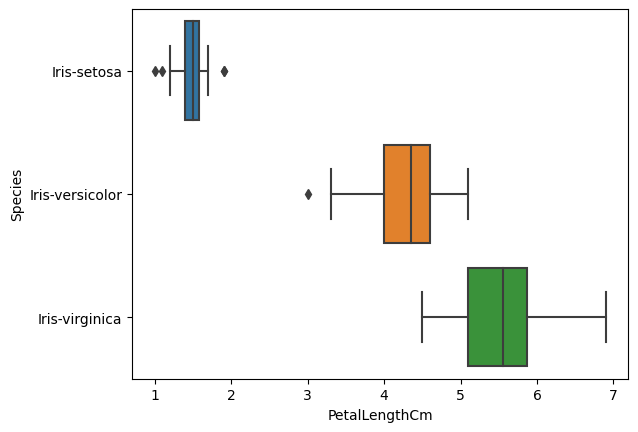

In [13]:
sns.boxplot(x='PetalLengthCm',y='Species',data=data)

<Axes: xlabel='PetalWidthCm', ylabel='Species'>

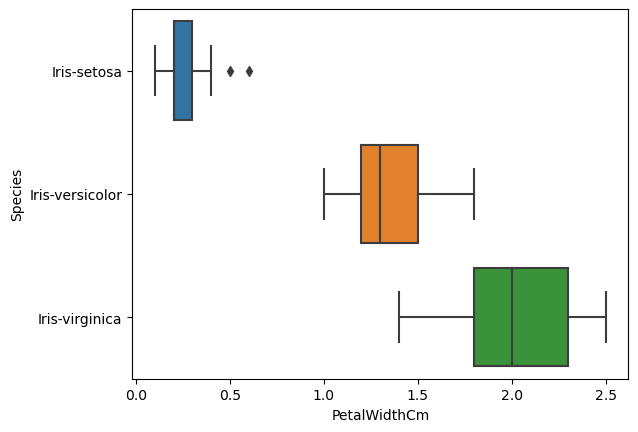

In [14]:
sns.boxplot(x='PetalWidthCm',y='Species',data=data)

<Axes: xlabel='SepalWidthCm', ylabel='Species'>

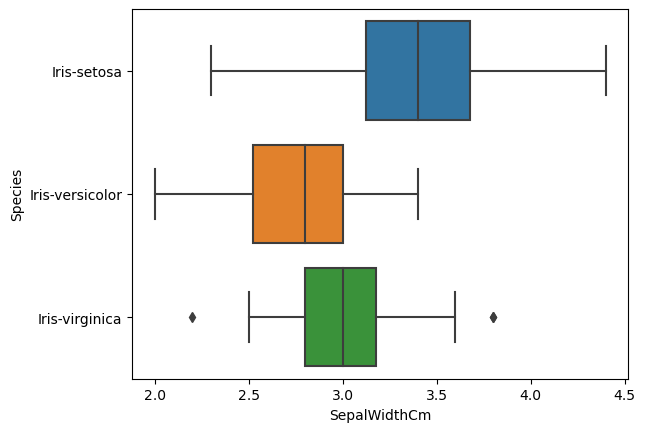

In [15]:
sns.boxplot(x='SepalWidthCm',y='Species',data=data)

<Axes: xlabel='SepalLengthCm', ylabel='Species'>

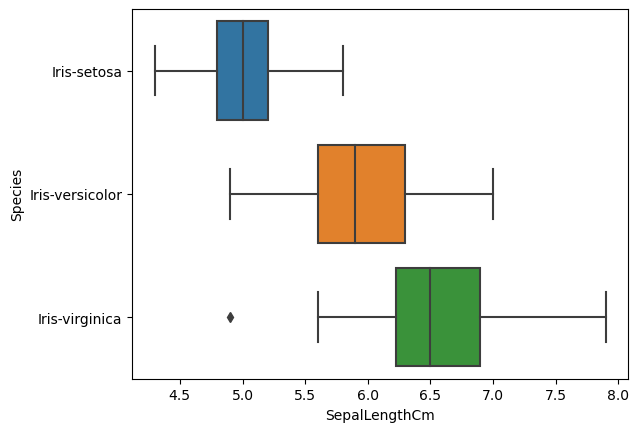

In [16]:
sns.boxplot(x='SepalLengthCm',y='Species',data=data)

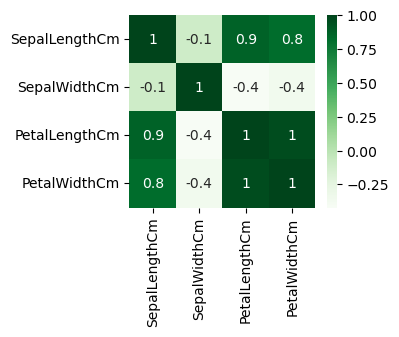

In [17]:
plt.figure(figsize=(3, 2.5))
sns.heatmap(data.corr(numeric_only=True),annot=True,fmt='.1g',cmap='Greens')
plt.show()
#heatmap to find correleation between different features

#### this shows that PetalLength is caucation of PetalWidth , PetalLength and PetalWidth are correlated to SepalLength

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

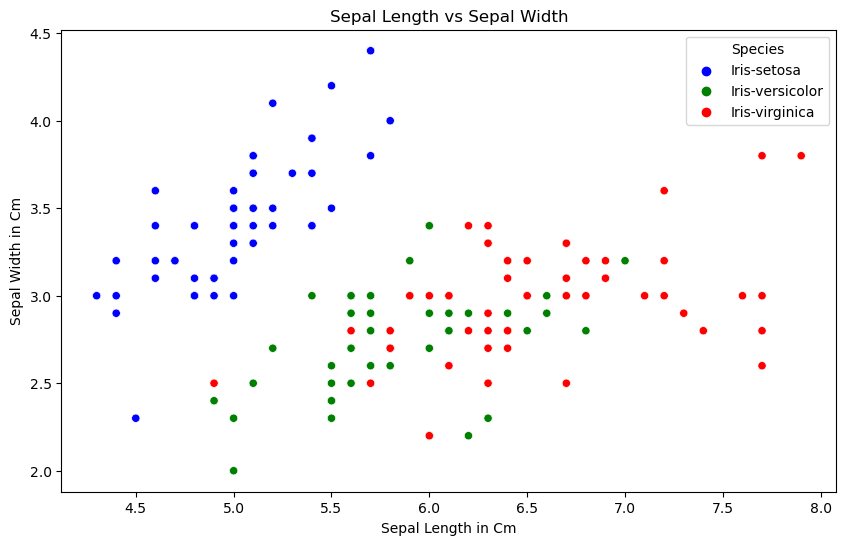

In [19]:
#Scatter plot for SepalLength and SepalWidth
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='SepalLengthCm', y='SepalWidthCm', hue='Species', palette=['blue', 'green', 'red'])
plt.xlabel('Sepal Length in Cm')
plt.ylabel('Sepal Width in Cm')
plt.title('Sepal Length vs Sepal Width')
plt.show()

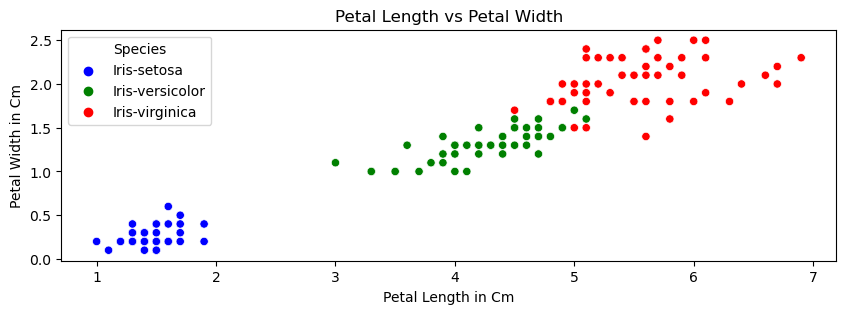

In [20]:
#Scatter plot for PetalLength and PetalWidth
plt.figure(figsize=(10, 3))
sns.scatterplot(data=data, x='PetalLengthCm', y='PetalWidthCm', hue='Species', palette=['blue', 'green', 'red'])
plt.xlabel('Petal Length in Cm')
plt.ylabel('Petal Width in Cm')
plt.title('Petal Length vs Petal Width')
plt.show()

#### petal features give a more efficient division as they are clustered.

### Splitting data set to train and test data

In [21]:
from sklearn.model_selection import train_test_split
X=data.drop('Species',axis=1)
y=data['Species']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=3)

#### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='lbfgs', max_iter=1000,random_state=3)
model.fit(X_train.values,y_train)

LogisticRegression(max_iter=1000, random_state=3)

In [23]:
predictions=model.predict(X_test.values)
Log_score=model.score(X_train.values,y_train)*100
print('Accuracy for train data:',Log_score)
from sklearn.metrics import accuracy_score
Log_accuracy=accuracy_score(predictions,y_test)*100
print('Accuracy for Logistic Regression:',Log_accuracy)

Accuracy for train data: 97.14285714285714
Accuracy for Logistic Regression: 97.77777777777777


#### KNN model

In [24]:
from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier(n_neighbors=3)
model2.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [25]:
predictions2=model2.predict(X_test)
KNN_score=model2.score(X_train,y_train)*100
print('Accuracy for train data:',KNN_score)
KNN_accuracy=accuracy_score(predictions2,y_test)*100
print('Accuracy for Logistic Regression:',KNN_accuracy)

Accuracy for train data: 97.14285714285714
Accuracy for Logistic Regression: 95.55555555555556


#### Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
model3= DecisionTreeClassifier()
model3.fit(X_train,y_train)

DecisionTreeClassifier()

In [27]:
predictions3=model3.predict(X_test)
Decission_score=model3.score(X_train,y_train)*100
print('Accuracy for train data:',Decission_score)
Decision_accuracy=accuracy_score(predictions3,y_test)*100
print('Accuracy for Logistic Regression:',Decision_accuracy)

Accuracy for train data: 100.0
Accuracy for Logistic Regression: 93.33333333333333


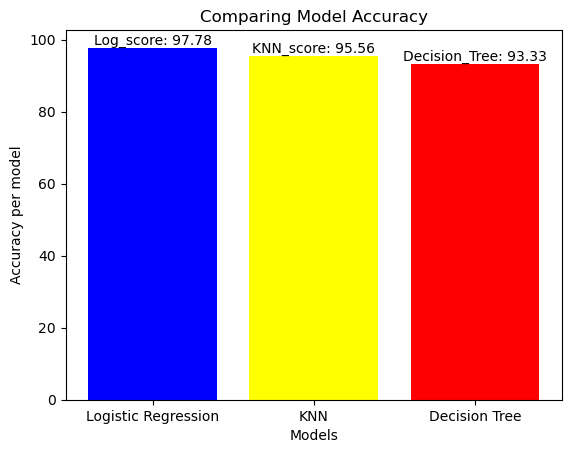

In [28]:
models = ['Logistic Regression', 'KNN', 'Decision Tree']
accuracies = [Log_accuracy, KNN_accuracy, Decision_accuracy]
scores = ['Log_score', 'KNN_score', 'Decision_Tree']  # Corrected the list

# Create a bar chart
plt.bar(models, accuracies, color=['blue', 'yellow', 'red'])

# Add labels and a title
plt.xlabel("Models")
plt.ylabel("Accuracy per model")
plt.title("Comparing Model Accuracy")

# Annotate the bars with their respective scores
for i in range(len(models)):
    plt.text(models[i], accuracies[i], f'{scores[i]}: {accuracies[i]:.2f}', ha='center', va='bottom')

# Show the bar chart
plt.show()

#### This shows that Logistics Regression is suitable for this dataset